### Neuroevolution:
- Bild -> preprocessing -> CNN -> MLP -> Eingabe (NES controller)
- CNN und MLP basieren auf pytorch
- CNN und MLP werden gemeinsam mutiert, die mutation vom agenten der am weitesten kam wird übernommen
- Distanz vom Start wird (fürs erste) der einzige reward sein

#### ToDo:
- Alle relevanten Hyperparameter zur Verfügung stellen (z.B: cnn_config, mlp_config)
- Verbesserung der GPU Auslastung (im Moment ist cpu-only schneller!)
- Models müssen gespeichert und geladen werden können
- Trainingslogik verbessern: Elitismus (behalte die n besten Agenten), dynamische Mutation (z.B: erhöhe Mutationsstärke bei Stillstand)

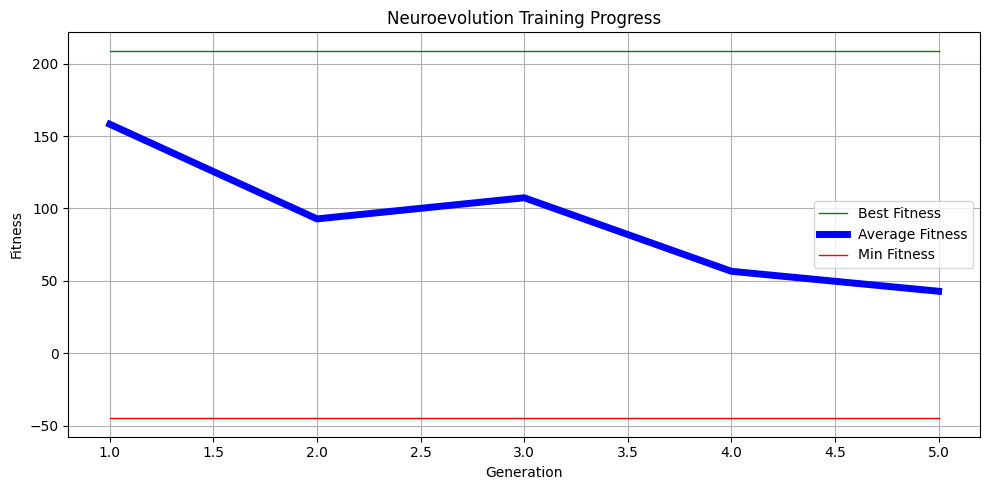

Generation: 5 / 5

Best: 209.00 | Average: 42.80 | Min: -45.00

Running best agent for recording...


/Users/babajane/Library/Python/3.9/lib/python/site-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /Users/babajane/Library/Mobile Documents/com~apple~CloudDocs/realRoot/uni/mac/6Semester/cognitiveComputing/SuperMarioReinforcementLearningProject/media/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/Users/babajane/Library/Python/3.9/lib/python/site-packages/gym/wrappers/monitoring/video_recorder.py:57: DeprecationWarning: WARN: `env.metadata["render.modes"] is marked as deprecated and will be replaced with `env.metadata["render_modes"]` see https://github.com/openai/gym/pull/2654 for more details
  logger.deprecation(
/Users/babajane/Library/Python/3.9/lib/python/site-packages/gym/wrappers/monitoring/video_recorder.py:130: DeprecationWarning: WARN: `env.metadata["video.frames_per_second"] is marked as deprecated and will be replaced with `env.metadata["render_fps"]` 


Final fitness: 209.00
Video saved to: ../media/videos


In [1]:
import torch
from src.non_reinforcement.neuroevolution.neuroevolution_trainer import NeuroevolutionTrainer
from src.non_reinforcement.neuroevolution.neuroevolution_net import NeuroevolutionNet
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

trainer = NeuroevolutionTrainer(
    base_model=NeuroevolutionNet(input_channels=1, num_actions=len(COMPLEX_MOVEMENT)),
    env_name='SuperMarioBros-v0',
    action_set=COMPLEX_MOVEMENT,
    device=DEVICE,
    video_dir="../media/videos",
    generations=5,
    population_size=5,
    max_steps_per_episode=1000,
    mutation_rate=0.05,
    mutation_strength=0.1
)

trainer.run()
trainer.record_best_agent()
